<a href="https://colab.research.google.com/github/Ananya45678/Machine-Learning-Codes/blob/main/ML_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine_data.csv to wine_data.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Lab Session Data.xlsx to Lab Session Data.xlsx


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt

**QUESTION 1.**

Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [5]:
df = pd.read_csv('wine_data.csv')

X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

print(f"\nAccuracy for Training Set: {metrics.accuracy_score(y_train, y_train_pred):.4f}")
print(f"Accuracy for Test Set: {metrics.accuracy_score(y_test, y_test_pred):.4f}")

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix for Training Data:\n", conf_matrix_train)
print("Confusion Matrix for Test Data:\n", conf_matrix_test)

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("Classification Report for Training Data:\n", train_report)
print("Classification Report for Test Data:\n", test_report)


Accuracy for Training Set: 0.7465
Accuracy for Test Set: 0.8056
Confusion Matrix for Training Data:
 [[37  1  4]
 [ 5 44 11]
 [ 4 11 25]]
Confusion Matrix for Test Data:
 [[17  0  0]
 [ 1  8  2]
 [ 1  3  4]]
Classification Report for Training Data:
               precision    recall  f1-score   support

           1       0.80      0.88      0.84        42
           2       0.79      0.73      0.76        60
           3       0.62      0.62      0.62        40

    accuracy                           0.75       142
   macro avg       0.74      0.75      0.74       142
weighted avg       0.75      0.75      0.75       142

Classification Report for Test Data:
               precision    recall  f1-score   support

           1       0.89      1.00      0.94        17
           2       0.73      0.73      0.73        11
           3       0.67      0.50      0.57         8

    accuracy                           0.81        36
   macro avg       0.76      0.74      0.75        36
weig

In [6]:
print("It is a regular fit model. ")
print("\nThe Training accuracy is 74.65% and the Testing accuracy is 80.56%. ")
print("\nAs the difference between the training and testing accuracies isn't too high it is a regular fit model. ")
print("\nPrecision, recall, and F1-score have remained consistent across training and test sets. ")
print("\nClass 1 performed the best while Class 3 had a low recall. ")

It is a regular fit model. 

The Training accuracy is 74.65% and the Testing accuracy is 80.56%. 

As the difference between the training and testing accuracies isn't too high it is a regular fit model. 

Precision, recall, and F1-score have remained consistent across training and test sets. 

Class 1 performed the best while Class 3 had a low recall. 


**QUESTION 2.**

 Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02.
Analyse the results.


In [7]:
sheet_name = "Purchase data"
df = pd.read_excel("Lab Session Data.xlsx", sheet_name = sheet_name)

X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = df['Payment (Rs)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

MSE_train = mean_squared_error(y_train, y_train_pred)
RMSE_train = np.sqrt(MSE_train)
MAPE_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
R2_train = r2_score(y_train, y_train_pred)

MSE_test = mean_squared_error(y_test, y_test_pred)
RMSE_test = np.sqrt(MSE_test)
MAPE_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
R2_test = r2_score(y_test, y_test_pred)

print(f"Training Values:  \nMSE: {MSE_train} \nRMSE: {RMSE_train} \nMAPE: {MAPE_train}% \nR²: {R2_train}")
print(f"\nTesting Values: \nMSE: {MSE_test} \nRMSE: {RMSE_test} \nMAPE: {MAPE_test}% \nR²: {R2_test}")

Training Values:  
MSE: 4.354512196819985e-26 
RMSE: 2.0867467974864572e-13 
MAPE: 8.56201808192539e-14% 
R²: 1.0

Testing Values: 
MSE: 5.533385933582265e-26 
RMSE: 2.352315015805125e-13 
MAPE: 1.2529022054387628e-13% 
R²: 1.0


**QUESTION 3.**

Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary
randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 -
Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class
color. Observe the plot.


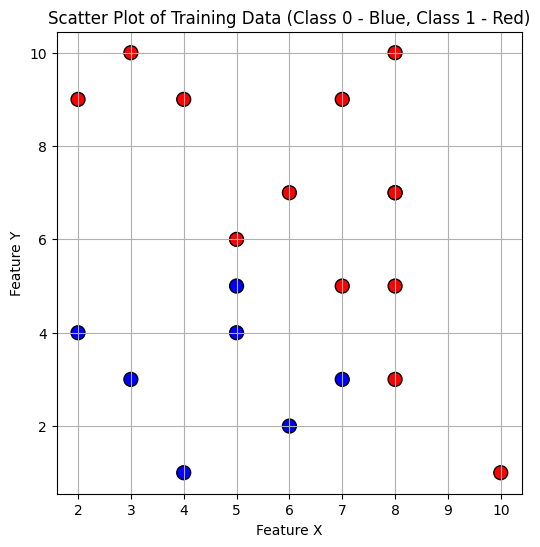

In [10]:
np.random.seed(42)

X_train = np.random.randint(1, 11, 20)
Y_train = np.random.randint(1, 11, 20)

classes = []
for i in range(20):
  if X_train[i] + Y_train[i] > 10:
    classes.append(1)
  else:
    classes.append(0)

classes_train = np.array(classes)

colors = np.array(["blue", "red"])
class_colors = [colors[c] for c in classes_train]

plt.figure(figsize=(6, 6))
plt.scatter(X_train, Y_train, c=class_colors, edgecolors='black', s=100)
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("Scatter Plot of Training Data (Class 0 - Blue, Class 1 - Red)")
plt.grid(True)
plt.show()

**QUESTION 4.**

Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1.
This creates a test set of about 10,000 points. Classify these points with above training data using
kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their
predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread
and class boundary lines in the feature space.


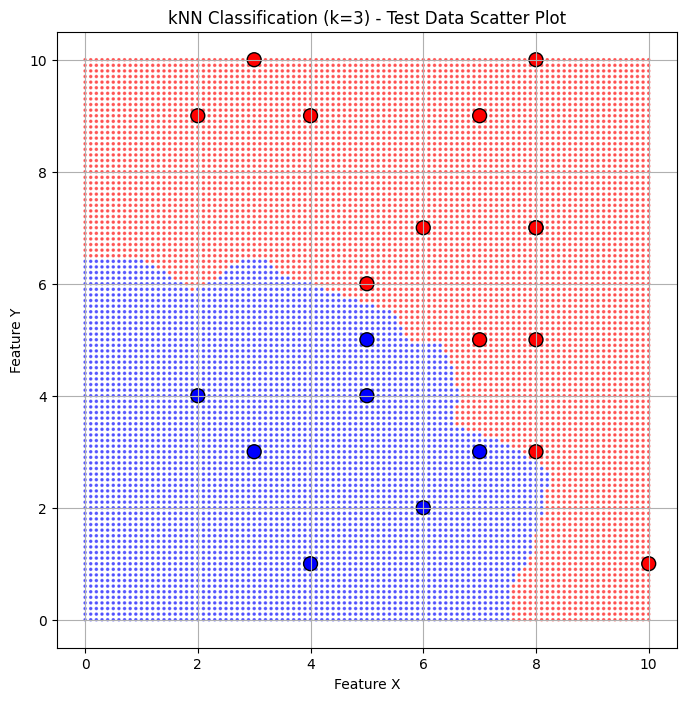

In [11]:
train_data = np.column_stack((X_train, Y_train))

X_test, Y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, classes_train)

predicted_classes = knn.predict(test_data)

colors = np.array(["blue", "red"])
test_colors = [colors[c] for c in predicted_classes]

plt.figure(figsize=(8, 8))
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_colors, marker='.', alpha=0.5, s=10)
plt.scatter(X_train, Y_train, c=[colors[c] for c in classes_train], edgecolors='black', s=100)
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("kNN Classification (k=3) - Test Data Scatter Plot")
plt.grid(True)
plt.show()

**QUESTION 5.**

Repeat A4 exercise for various values of k and observe the change in the class boundary lines

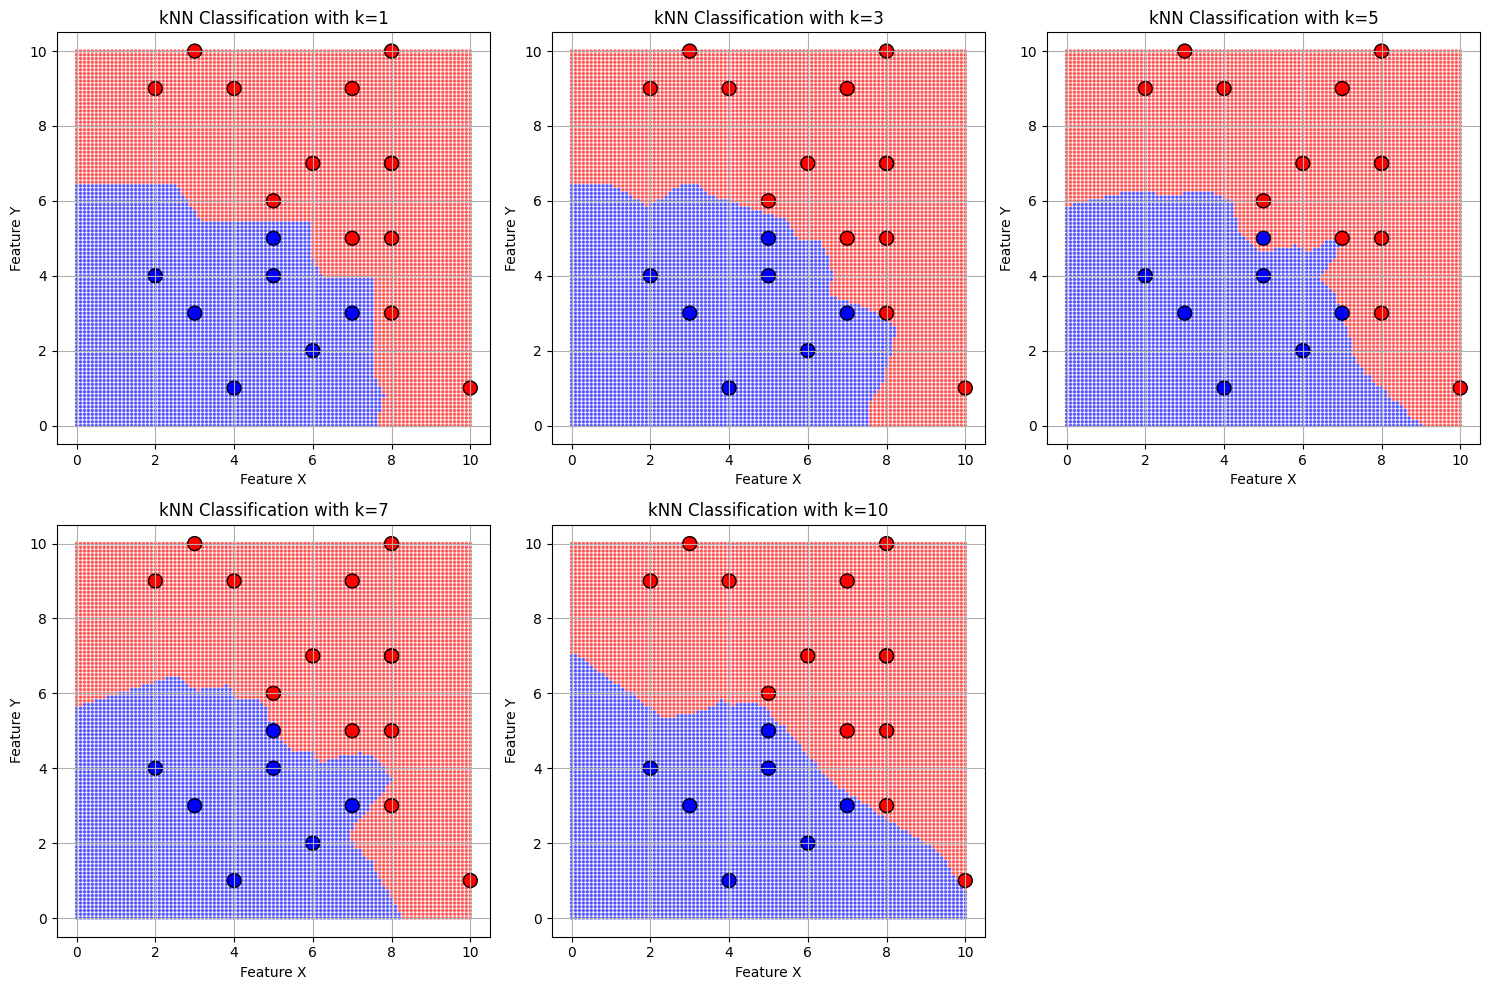

In [13]:
k_values = [1, 3, 5, 7, 10]

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, classes_train)
    predicted_classes = knn.predict(test_data)

    colors = np.array(["blue", "red"])
    test_colors = [colors[c] for c in predicted_classes]

    plt.subplot(2, 3, i + 1)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_colors, marker='.', alpha=0.5, s=10)
    plt.scatter(X_train, Y_train, c=[colors[c] for c in classes_train], edgecolors='black', s=100)
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title(f"kNN Classification with k={k}")
    plt.grid(True)

plt.tight_layout()
plt.show()

**QUESTION 6.**

 Repeat the exercises A3 to A5 for your project data considering any two features and classes.

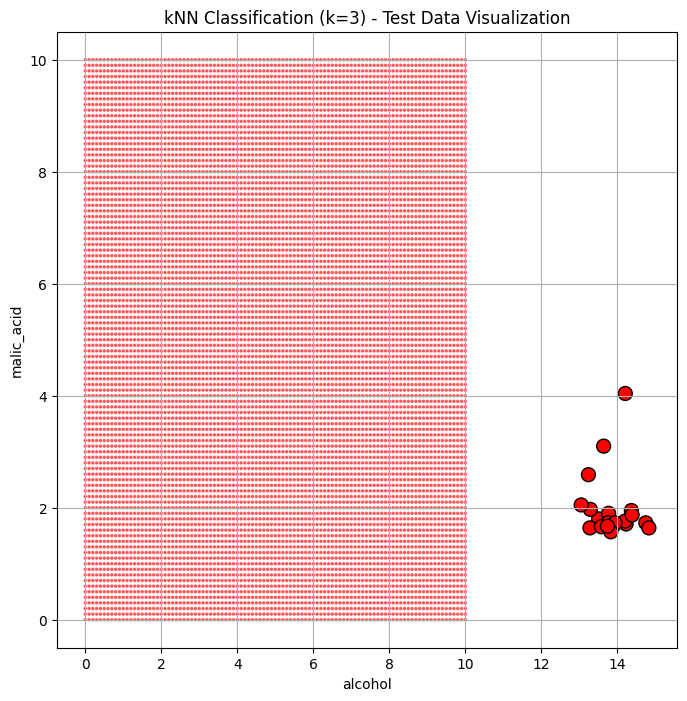

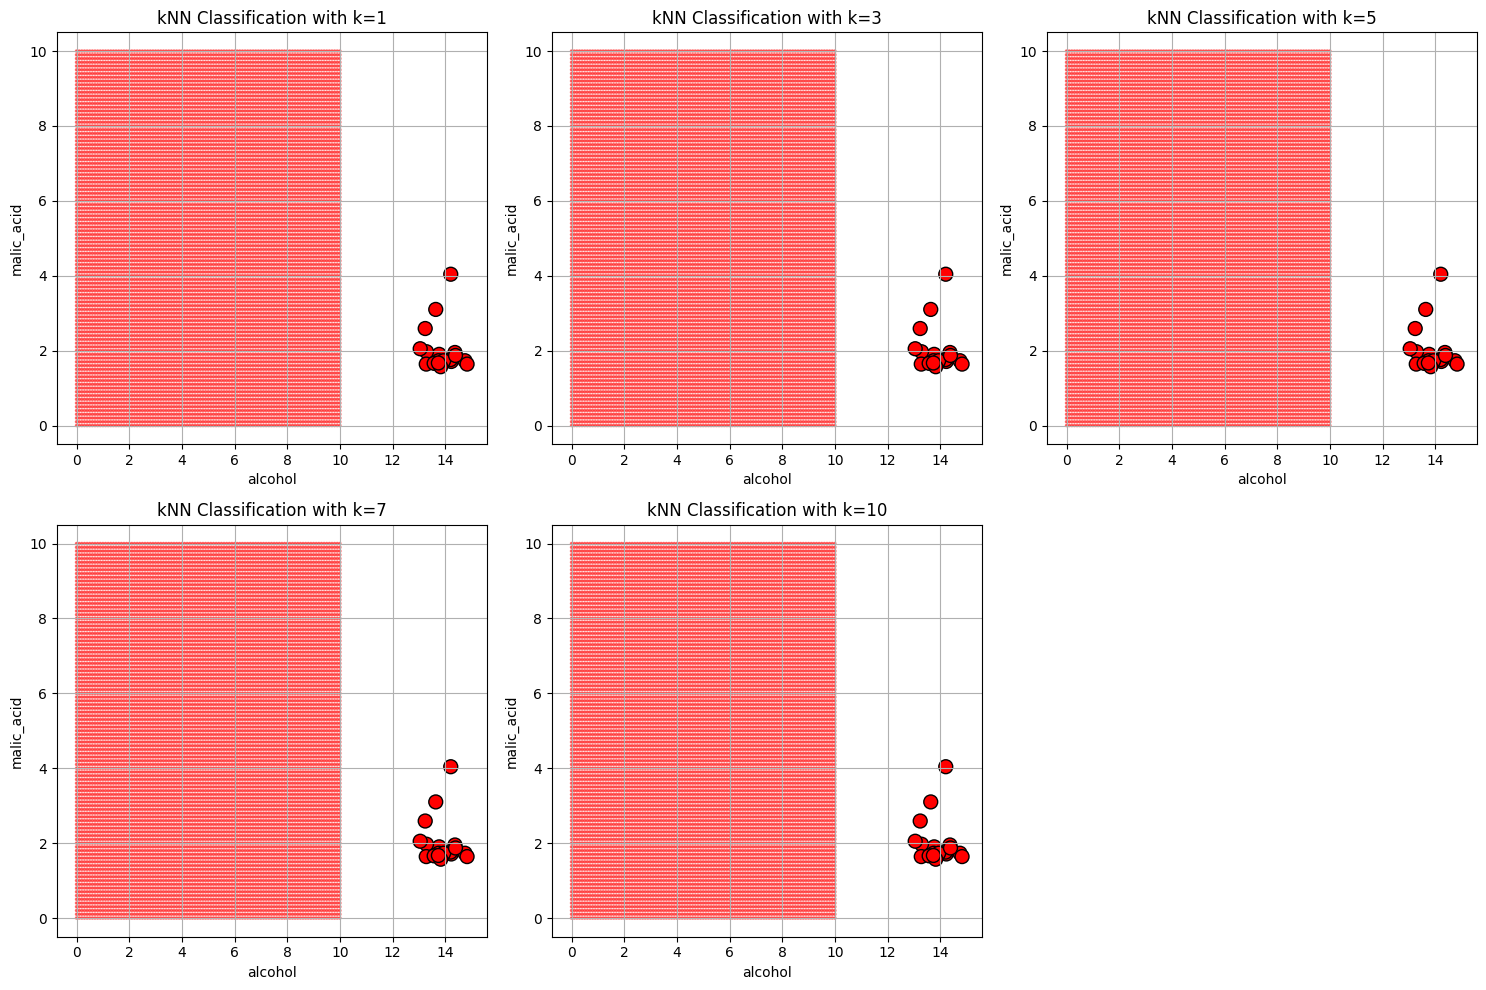

In [14]:
df = pd.read_csv("wine_data.csv")

X_feature = "alcohol"
Y_feature = "malic_acid"
class_column = "class"

X = df[[X_feature, Y_feature]]
y = df[class_column]

df = df[df[class_column].isin([0, 1])]

train_data = df.sample(n=20, random_state=42)
X_train = train_data[[X_feature, Y_feature]].values
y_train = train_data[class_column].values

X_test, Y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

predicted_classes = knn.predict(test_data)

colors = np.array(["blue", "red"])
test_colors = [colors[c] for c in predicted_classes]

plt.figure(figsize=(8, 8))
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_colors, marker='.', alpha=0.5, s=10)
plt.scatter(X_train[:, 0], X_train[:, 1], c=[colors[c] for c in y_train], edgecolors='black', s=100)
plt.xlabel(X_feature)
plt.ylabel(Y_feature)
plt.title("kNN Classification (k=3) - Test Data Visualization")
plt.grid(True)
plt.show()

k_values = [1, 3, 5, 7, 10]

plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predicted_classes = knn.predict(test_data)

    test_colors = [colors[c] for c in predicted_classes]

    plt.subplot(2, 3, i + 1)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_colors, marker='.', alpha=0.5, s=10)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=[colors[c] for c in y_train], edgecolors='black', s=100)
    plt.xlabel(X_feature)
    plt.ylabel(Y_feature)
    plt.title(f"kNN Classification with k={k}")
    plt.grid(True)

plt.tight_layout()
plt.show()

**QUESTION 7.**

Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your
kNN classifier.

In [18]:
df = pd.read_csv('wine_data.csv')

X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

param_grid = {'n_neighbors': np.arange(1, 30, 2)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_k_grid = grid_search.best_params_['n_neighbors']
print(f"Best k found using GridSearchCV: {best_k_grid}")

best_knn = KNeighborsClassifier(n_neighbors=best_k_grid)
best_knn.fit(X_train, y_train)

y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

print(f"\nAccuracy for Training Set: {metrics.accuracy_score(y_train, y_train_pred):.4f}")
print(f"Accuracy for Test Set: {metrics.accuracy_score(y_test, y_test_pred):.4f}")

Best k found using GridSearchCV: 21

Accuracy for Training Set: 0.7254
Accuracy for Test Set: 0.7778


In [19]:
df = pd.read_csv('wine_data.csv')

X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

param_grid = {'n_neighbors': np.arange(1, 30, 2)}

random_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, n_iter=5, cv=5, scoring='accuracy', random_state=9)
random_search.fit(X_train, y_train)

best_k_random = random_search.best_params_['n_neighbors']
print(f"Best k found using RandomizedSearchCV: {best_k_random}")

best_knn = KNeighborsClassifier(n_neighbors=best_k_random)
best_knn.fit(X_train, y_train)

y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

print(f"\nAccuracy for Training Set: {metrics.accuracy_score(y_train, y_train_pred):.4f}")
print(f"Accuracy for Test Set: {metrics.accuracy_score(y_test, y_test_pred):.4f}")

Best k found using RandomizedSearchCV: 21

Accuracy for Training Set: 0.7254
Accuracy for Test Set: 0.7778
